In [1]:
import pandas as pd
df = pd.read_csv('exoplanets.csv', nrows=400)

In [2]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [3]:
df['LABEL'].value_counts()

1    363
2     37
Name: LABEL, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

X = df.iloc[:,1:]
y = df.iloc[:,0]

def light_plot(index):
    y_vals = X.iloc[index]
    x_vals = np.arange(len(y_vals))
    plt.figure(figsize=(15,8))
    plt.xlabel('Number of Observations')
    plt.ylabel('Light Flux')
    plt.title('Light Plot ' + str(index), size=15)
    plt.plot(x_vals, y_vals)
    plt.show()

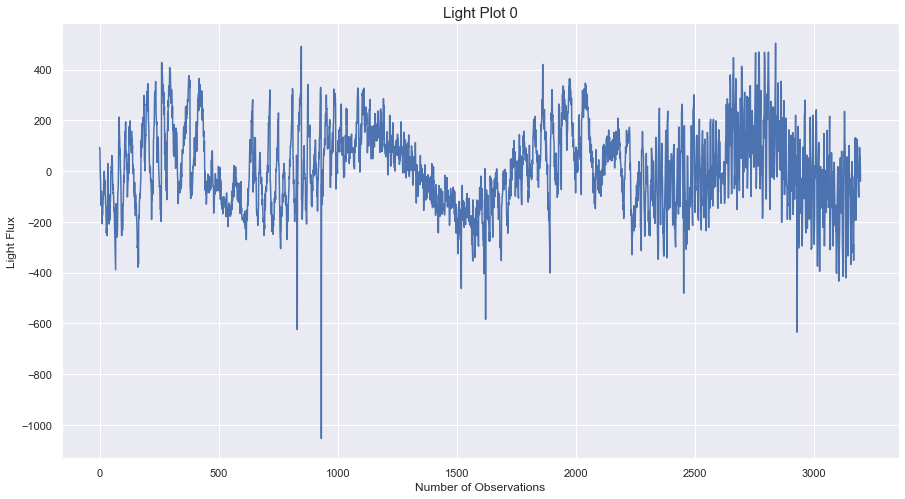

In [5]:
light_plot(0)

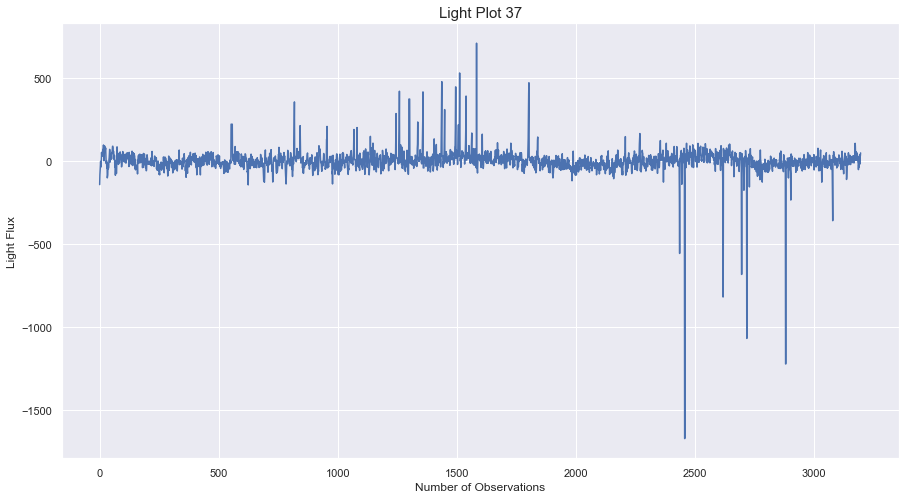

In [6]:
light_plot(37)

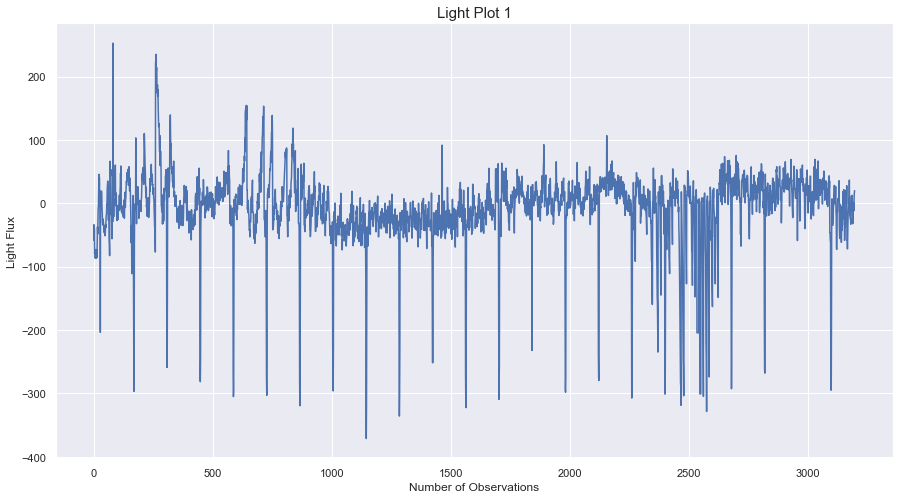

In [7]:
light_plot(1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 9.8 MB


In [9]:
# Sum null values
df.isnull().sum().sum()

0

In [10]:
# Import XGBRegressor
from xgboost import XGBClassifier

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [11]:
# Instantiate the XGBRegressor, xg_reg
model = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2)

# Fit xg_reg to training set
model.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = model.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score))

Score: 0.89


In [12]:
len(y_test[y_test==1])

88

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[86,  2],
       [ 9,  3]], dtype=int64)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.98      0.94        88
           2       0.60      0.25      0.35        12

    accuracy                           0.89       100
   macro avg       0.75      0.61      0.65       100
weighted avg       0.87      0.89      0.87       100



In [15]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, pos_label=2)

0.25

In [16]:
def xgb_clf(model, nrows):

    df = pd.read_csv('exoplanets.csv', nrows=nrows)
    # Split data into X and y
    X = df.iloc[:,1:]
    y = df.iloc[:,0]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

    # Fit xg_reg to training set
    model.fit(X_train, y_train)

    # Predict labels of test set, y_pred
    y_pred = model.predict(X_test)

    score = recall_score(y_test, y_pred, pos_label=2)
    
    print(confusion_matrix(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
        
    return score

In [17]:
xgb_clf(XGBClassifier(random_state=2), nrows=800)

[[189   1]
 [  9   1]]
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       190
           2       0.50      0.10      0.17        10

    accuracy                           0.95       200
   macro avg       0.73      0.55      0.57       200
weighted avg       0.93      0.95      0.93       200



0.1

In [18]:
xgb_clf(XGBClassifier(random_state=2), nrows=200)

[[37  0]
 [ 8  5]]
              precision    recall  f1-score   support

           1       0.82      1.00      0.90        37
           2       1.00      0.38      0.56        13

    accuracy                           0.84        50
   macro avg       0.91      0.69      0.73        50
weighted avg       0.87      0.84      0.81        50



0.38461538461538464

In [19]:
xgb_clf(XGBClassifier(random_state=2), nrows=74)

[[6 2]
 [5 6]]
              precision    recall  f1-score   support

           1       0.55      0.75      0.63         8
           2       0.75      0.55      0.63        11

    accuracy                           0.63        19
   macro avg       0.65      0.65      0.63        19
weighted avg       0.66      0.63      0.63        19



0.5454545454545454

In [20]:
df_train = pd.merge(y_train, X_train, left_index=True, right_index=True)

In [21]:
newdf = pd.DataFrame(np.repeat(df_train[df_train['LABEL']==2].values,9,axis=0))
newdf.columns = df_train.columns
df_train_resample = pd.concat([df_train, newdf])

df_train_resample['LABEL'].value_counts()

1.0    275
2.0    250
Name: LABEL, dtype: int64

In [22]:
X_train_resample = df_train_resample.iloc[:,1:]
y_train_resample = df_train_resample.iloc[:,0]

In [23]:
# Instantiate the XGBRegressor, xg_reg
model = XGBClassifier(random_state=2)

# Fit xg_reg to training set
model.fit(X_train_resample, y_train_resample)

# Predict labels of test set, y_pred
y_pred = model.predict(X_test)

score = recall_score(y_test, y_pred, pos_label=2)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(score)

[[86  2]
 [ 8  4]]
              precision    recall  f1-score   support

           1       0.91      0.98      0.95        88
           2       0.67      0.33      0.44        12

    accuracy                           0.90       100
   macro avg       0.79      0.66      0.69       100
weighted avg       0.89      0.90      0.88       100

0.3333333333333333


In [24]:
df['LABEL'] = df['LABEL'].replace(1, 0)
df['LABEL'] = df['LABEL'].replace(2, 1)

df['LABEL'].value_counts()

0    363
1     37
Name: LABEL, dtype: int64

In [25]:
# Split data into X and y
X = df.iloc[:,1:]
y = df.iloc[:,0]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [26]:
model = XGBClassifier(scale_pos_weight=10, random_state=2)

model.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = model.predict(X_test)

score = recall_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(score)

[[86  2]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        88
           1       0.67      0.33      0.44        12

    accuracy                           0.90       100
   macro avg       0.79      0.66      0.69       100
weighted avg       0.89      0.90      0.88       100

0.3333333333333333


In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

In [28]:
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=2)

model = XGBClassifier(scale_pos_weight=10, random_state=2)

# Obtain scores of cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='recall')

# Display accuracy
print('Recall: ', scores)

# Display mean accuracy
print('Recall mean: ', scores.mean())

Recall:  [0.10526316 0.27777778]
Recall mean:  0.1915204678362573


In [29]:
def grid_search(params, random=False, X=X, y=y, model=XGBClassifier(random_state=2, scale_pos_weight=10)): 
    
    xgb = model
    
    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_jobs=-1, random_state=2, scoring='recall')
    else:
        # Instantiate GridSearchCV as grid_reg
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1, scoring='recall')
    
    # Fit grid_reg on X_train and y_train
    grid.fit(X, y)

    # Extract best params
    best_params = grid.best_params_

    # Print best params
    print("Best params:", best_params)
    
    # Compute best score
    best_score = grid.best_score_

    # Print best score
    print("Best score: {:.5f}".format(best_score))

In [30]:
grid_search(params={'n_estimators':[50, 200, 400, 800]})

Best params: {'n_estimators': 50}
Best score: 0.19152


In [31]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.2, 0.3]})

Best params: {'learning_rate': 0.01}
Best score: 0.40351


In [32]:
grid_search(params={'max_depth':[1, 2, 4, 8]})

Best params: {'max_depth': 2}
Best score: 0.24415


In [33]:
grid_search(params={'subsample':[0.3, 0.5, 0.7, 0.9]})

Best params: {'subsample': 0.5}
Best score: 0.21637


In [34]:
grid_search(params={'gamma':[0.05, 0.1, 0.5, 1]})

Best params: {'gamma': 0.05}
Best score: 0.24415


In [35]:
grid_search(params={'learning_rate':[0.001, 0.01, 0.03], 'max_depth':[1, 2], 'gamma':[0.025, 0.05, 0.5]})

Best params: {'gamma': 0.025, 'learning_rate': 0.001, 'max_depth': 2}
Best score: 0.53509


In [36]:
grid_search(params={'max_delta_step':[1, 3, 5, 7]})

Best params: {'max_delta_step': 1}
Best score: 0.24415


In [54]:
grid_search(params={'subsample':[0.3, 0.5, 0.7, 0.9, 1], 
                    'colsample_bylevel':[0.3, 0.5, 0.7, 0.9, 1], 
                    'colsample_bynode':[0.3, 0.5, 0.7, 0.9, 1], 
                    'colsample_bytree':[0.3, 0.5, 0.7, 0.9, 1]}, random=True)

Best params: {'subsample': 0.3, 'colsample_bytree': 0.7, 'colsample_bynode': 0.7, 'colsample_bylevel': 1}
Best score: 0.35380


In [38]:
X_short = X.iloc[:74, :]
y_short = y.iloc[:74]

In [39]:
grid_search(params={'max_depth':[1, 2, 3], 'colsample_bynode':[0.5, 0.75, 1]}, X=X_short, y=y_short, 
            model=XGBClassifier(random_state=2))

Best params: {'colsample_bynode': 0.5, 'max_depth': 2}
Best score: 0.65058


In [40]:
df_all = pd.read_csv('exoplanets.csv')
df_all['LABEL'] = df_all['LABEL'].replace(1, 0)
df_all['LABEL'] = df_all['LABEL'].replace(2, 1)

X_all = df_all.iloc[:,1:]
y_all = df_all.iloc[:,0]

In [41]:
df_all['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [42]:
weight = int(5050/37)

In [43]:
model = XGBClassifier(scale_pos_weight=weight, random_state=2)

# Obtain scores of cross-validation
scores = cross_val_score(model, X_all, y_all, cv=kfold, scoring='recall')

# Display accuracy
print('Recall:', scores)

# Display mean accuracy
print('Recall mean:', scores.mean())

Recall: [0.10526316 0.        ]
Recall mean: 0.05263157894736842


In [55]:
grid_search(params={'learning_rate':[0.001, 0.01]}, X=X_all, y=y_all, model=XGBClassifier(scale_pos_weight=weight, random_state=2))

Best params: {'learning_rate': 0.001}
Best score: 0.26316


In [45]:
grid_search(params={'max_depth':[1, 2],'learning_rate':[0.001]}, X=X_all, y=y_all, 
            model=XGBClassifier(scale_pos_weight=weight, random_state=2))

Best params: {'learning_rate': 0.001, 'max_depth': 2}
Best score: 0.53509


In [63]:
def final_model(X, y, model):
    model.fit(X, y)
    y_pred = model.predict(X_all)
    score = recall_score(y_all, y_pred)
    print(score)
    print(confusion_matrix(y_all, y_pred))
    print(classification_report(y_all, y_pred))

In [64]:
final_model(X_short, y_short, XGBClassifier(max_depth=2, colsample_by_node=0.5, random_state=2))

[14:33:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { colsample_by_node } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


1.0
[[3588 1462]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      5050
           1       0.02      1.00      0.05        37

    accuracy                           0.71      5087
   macro avg       0.51      0.86      0.44      5087
weighted avg       0.99      0.71      0.83      5087



In [48]:
final_model(X, y, XGBClassifier(max_depth=2, colsample_bynode=0.5, scale_pos_weight=10, random_state=2))

1.0
[[4901  149]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      5050
           1       0.20      1.00      0.33        37

    accuracy                           0.97      5087
   macro avg       0.60      0.99      0.66      5087
weighted avg       0.99      0.97      0.98      5087



In [49]:
final_model(X_all, y_all, XGBClassifier(max_depth=2, colsample_bynode=0.5, scale_pos_weight=weight, random_state=2))

1.0
[[5050    0]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5050
           1       1.00      1.00      1.00        37

    accuracy                           1.00      5087
   macro avg       1.00      1.00      1.00      5087
weighted avg       1.00      1.00      1.00      5087

